In [4]:
%matplotlib inline
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

np.random.seed(0)

(650L, 10L) (350L, 10L)


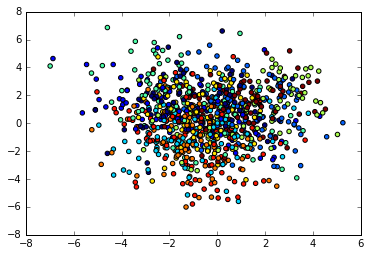

In [5]:
from sklearn.datasets import make_classification
X, y = make_classification(1000, 10, n_redundant = 0, n_informative = 10, n_classes=10, n_clusters_per_class=1)
X1, X2, y1, y2 = train_test_split(X, y, test_size=0.35)
print X1.shape, X2.shape
plt.scatter(X[:,0], X[:,1], c=y)

#### Train/Test/Evaluation and Cross Validation

In [6]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

gnb = GaussianNB()

# split on train and test and evaluate
gnb.fit(X1, y1)
predicted = gnb.predict(X2)
print metrics.accuracy_score(y2, predicted)

# cross validation 
scores = cross_val_score(gnb, X, y, cv=5)
print scores.mean()

# prediction using cross validation: uses prediction on each of K folds
predicted = cross_val_predict(gnb, X, y, cv=5)
print metrics.accuracy_score(y, predicted)

0.565714285714
0.555110191683
0.555


#### Tuning Parameters: Grid Search and Randomized Search 

In [7]:
# http://scikit-learn.org/stable/auto_examples/model_selection/randomized_search.html
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
import time

# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
sgd = linear_model.SGDClassifier()
print cross_val_score(sgd, X, y, cv=5).mean()

X1, X2, y1, y2 = train_test_split(X, y)

# using Grid Search
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV
params = [{'alpha': [0.0001, 0.001, 0.01, 0.1, 1]}]
clf = GridSearchCV(sgd, params)
start = time.time()
clf.fit(X1, y1)
predicted = clf.predict(X2)
print 'Grid Search time:', time.time() - start
print 'Grid Search best alpha:', clf.best_params_['alpha']
print 'Grid Search accuracy:', metrics.accuracy_score(y2, predicted)

# using Randomized search
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
clf = RandomizedSearchCV(sgd, {'alpha': uniform()}, n_iter=20)
start = time.time()
clf.fit(X1, y1)
predicted = clf.predict(X2)
print 'Randomized Search time:', time.time() - start
print 'Randomized Search best alpha:', clf.best_params_['alpha']
print 'Randomized Search accuracy:', metrics.accuracy_score(predicted, y2)

0.448571484882
Grid Search time: 0.756999969482
Grid Search best alpha: 0.1
Grid Search accuracy: 0.496
Randomized Search time: 1.65499997139
Randomized Search best alpha: 0.121310984136
Randomized Search accuracy: 0.504


#### Linear Models: LDA, Naive Bayes, SGD

In [8]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA

params = [{'C': 10**-np.arange(5.), 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag']},
          {'C': 10**-np.arange(5.), 'penalty': ['l1']}]
lr = GridSearchCV(LogisticRegression(), params)
start = time.time()
lr.fit(X1, y1)
finish = time.time()
predicted = lr.predict(X2)
print 'Fitting the model with Grid Search time:', finish-start
print 'Randomized Search best params:', lr.best_params_
print 'Predicted Linear Regression score:', metrics.accuracy_score(predicted, y2)

Fitting the model with Grid Search time: 3.48200011253
Randomized Search best params: {'C': 1.0, 'solver': 'newton-cg'}
Predicted Linear Regression score: 0.472


In [9]:
sgd_params = {'alpha': 10**-np.arange(5.), 'loss': ['hinge', 'log', 'huber'], 'penalty': ['l2', 'l1', 'elasticnet']}
sgd = GridSearchCV(SGDClassifier(), sgd_params)
sgd.fit(X1, y1)
predicted = sgd.predict(X2)
print 'Best SGD Params:', sgd.best_params_
print 'Predicted SGD score:', metrics.accuracy_score(predicted, y2)

Best SGD Params: {'penalty': 'l2', 'alpha': 0.01, 'loss': 'log'}
Predicted SGD score: 0.436


In [10]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB
B_list = [GaussianNB, BernoulliNB]
for b in B_list:
    gnb = b()
    gnb.fit(X1, y1)
    predicted = gnb.predict(X2)
    print 'Predicted NB score', metrics.accuracy_score(y2, predicted)

Predicted NB score 0.508
Predicted NB score 0.42


In [11]:
lda = LDA()
lda.fit(X1, y1)
predicted = lda.predict(X2)
print 'LDA accuracy:', metrics.accuracy_score(predicted, y2)

qda = QDA()
qda.fit(X1, y1)
predicted = qda.predict(X2)
print 'QDA accuracy:', metrics.accuracy_score(predicted, y2)



LDA accuracy: 0.52
QDA accuracy: 0.92


#### Multiclass Classification: One-vs-Rest, One-vs-One, Error Correcting Output Codes

* Inherently multiclass: Naive Bayes, LDA and QDA, Decision Trees, Random Forests, Nearest Neighbors. 
* Other linear models use One-Vs-Rest strategy, except SVM that uses One-vs-One strategy. 

The default strategy can be overwritten by `multiclass` library. 

In [12]:
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier, OutputCodeClassifier

In [43]:
X, y = make_classification(1000, 250, n_redundant = 0, n_informative = 250, n_classes=250, n_clusters_per_class=1)
X1, X2, y1, y2 = train_test_split(X, y)

# Built-In OVR
lr = LogisticRegression(C=0.1)
start = time.time()
lr.fit(X1, y1)
finish = time.time()
y_pred = lr.predict(X2)
print 'Time Built-in OVR:', finish - start
print 'Accuracy Built-in OVR:', metrics.accuracy_score(y2, y_pred)
print 

# One-vs-Rest algorithm
lr = OneVsRestClassifier(LogisticRegression(C=0.1))
start = time.time()
lr.fit(X1, y1)
finish = time.time()
y_pred = lr.predict(X2)
print 'Time OVR:', finish - start
print 'Accuracy OVR:', metrics.accuracy_score(y2, y_pred)
print 

# One-vs-One algorithm
lr = OneVsOneClassifier(LogisticRegression(C=0.1))
start = time.time()
lr.fit(X1, y1)
finish = time.time()
y_pred = lr.predict(X2)
print 'Time OVO:', finish - start
print 'Accuracy OVO:', metrics.accuracy_score(y2, y_pred)
print 

# ECOC algorithm
# http://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OutputCodeClassifier.html
lr = OutputCodeClassifier(LogisticRegression(C=0.1), code_size=10)
start = time.time()
lr.fit(X1, y1)
finish = time.time()
y_pred = lr.predict(X2)
print 'Time ECOC:', finish - start
print 'Accuracy ECOC:', metrics.accuracy_score(y2, y_pred)
print

Time Built-in OVR: 44.9590001106
Accuracy Built-in OVR: 0.008

Time OVR: 37.736000061
Accuracy OVR: 0.008

Time OVO: 167.676000118
Accuracy OVO: 0.02

Time ECOC: 272.683000088
Accuracy ECOC: 0.008



In [48]:
X, y = make_classification(1000, 10, n_redundant = 0, n_informative = 10, n_classes=10, n_clusters_per_class=1)
X1, X2, y1, y2 = train_test_split(X, y)

# Built-In OVR
lr = LogisticRegression(C=0.1)
start = time.time()
lr.fit(X1, y1)
finish = time.time()
y_pred = lr.predict(X2)
print 'Time Built-in OVR:', finish - start
print 'Accuracy Built-in OVR:', metrics.accuracy_score(y2, y_pred)
print 

# One-vs-Rest algorithm
lr = OneVsRestClassifier(LogisticRegression(C=0.1))
start = time.time()
lr.fit(X1, y1)
finish = time.time()
y_pred = lr.predict(X2)
print 'Time OVR:', finish - start
print 'Accuracy OVR:', metrics.accuracy_score(y2, y_pred)
print 

# One-vs-One algorithm
lr = OneVsOneClassifier(LogisticRegression(C=0.1))
start = time.time()
lr.fit(X1, y1)
finish = time.time()
y_pred = lr.predict(X2)
print 'Time OVO:', finish - start
print 'Accuracy OVO:', metrics.accuracy_score(y2, y_pred)
print 

# ECOC algorithm
# http://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OutputCodeClassifier.html
lr = OutputCodeClassifier(LogisticRegression(C=0.1), code_size=10)
start = time.time()
lr.fit(X1, y1)
finish = time.time()
y_pred = lr.predict(X2)
print 'Time ECOC:', finish - start
print 'Accuracy ECOC:', metrics.accuracy_score(y2, y_pred)
print

Time Built-in OVR: 0.0499999523163
Accuracy Built-in OVR: 0.568

Time OVR: 0.164999961853
Accuracy OVR: 0.568

Time OVO: 0.353999853134
Accuracy OVO: 0.628

Time ECOC: 0.947999954224
Accuracy ECOC: 0.524

